In [8]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes
diabaties_data = load_diabetes()
print(diabaties_data["DESCR"])
diabaties_data.keys()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
# Save the input and target variables

data = diabaties_data['data']
target = diabaties_data['target']

In [4]:
# Normalise the target data (this will make clearer training curves)
import numpy as np
target = (target-target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, target,test_size=0.1)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(397, 10)
(397,)
(45, 10)
(45,)


#### Train a feedforward neural network model

In [6]:
x_train.shape[1]

10

In [9]:
# Build the model
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear')

    ])
    return model
model = get_model()

In [10]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 15,073
Trainable params: 15,073
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [12]:
# Train the model, with some of the data reserved for validation

history = model.fit(x_train,y_train,validation_split=0.1,epochs=100,verbose=1,batch_size=8)

Train on 357 samples, validate on 40 samples
Epoch 1/100
357/357 [==============================] - 2s 4ms/sample - loss: 0.8837 - mae: 0.8098 - val_loss: 0.7725 - val_mae: 0.7632
Epoch 2/100
357/357 [==============================] - 0s 1ms/sample - loss: 0.6136 - mae: 0.6459 - val_loss: 0.4644 - val_mae: 0.5431
Epoch 3/100
357/357 [==============================] - 0s 1ms/sample - loss: 0.5318 - mae: 0.5850 - val_loss: 0.5071 - val_mae: 0.5702
Epoch 4/100
357/357 [==============================] - 0s 1ms/sample - loss: 0.5054 - mae: 0.5822 - val_loss: 0.4466 - val_mae: 0.5296
Epoch 5/100
357/357 [==============================] - 0s 1ms/sample - loss: 0.4862 - mae: 0.5640 - val_loss: 0.4698 - val_mae: 0.5433
Epoch 6/100
357/357 [==============================] - 0s 1ms/sample - loss: 0.4932 - mae: 0.5632 - val_loss: 0.4740 - val_mae: 0.5313
Epoch 7/100
357/357 [==============================] - 0s 1ms/sample - loss: 0.4855 - mae: 0.5727 - val_loss: 0.4371 - val_mae: 0.5100
Epoch 8/10

In [13]:
# Evaluate the model on the test set
loss,mae = model.evaluate(x_test,y_test)
print(f"loss:{loss}")
print(f"mae:{mae}")

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Plot the learning curves

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

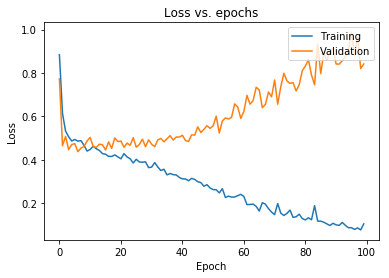

In [15]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [16]:
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import regularizers

In [17]:
def get_regularised_model(wd, rate):
    model = tf.keras.models.Sequential([
        Dense(128, activation="relu", input_shape=(x_train.shape[1],),kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(wd)),
        Dense(128, activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(0.01,0.05)


In [19]:
# Compile the model

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [20]:
# Train the model, with some of the data reserved for validation
model.fit(x_train,y_train,validation_split=0.20,epochs=100,batch_size=8,verbose=1)


Train on 317 samples, validate on 80 samples
Epoch 1/100
317/317 [==============================] - 2s 7ms/sample - loss: 4.6642 - mae: 0.8549 - val_loss: 3.2819 - val_mae: 0.7968
Epoch 2/100
317/317 [==============================] - 1s 2ms/sample - loss: 2.3990 - mae: 0.7326 - val_loss: 1.7667 - val_mae: 0.6990
Epoch 3/100
317/317 [==============================] - 1s 3ms/sample - loss: 1.3967 - mae: 0.6254 - val_loss: 1.1578 - val_mae: 0.6033
Epoch 4/100
317/317 [==============================] - 1s 2ms/sample - loss: 1.0222 - mae: 0.5986 - val_loss: 0.9166 - val_mae: 0.5934
Epoch 5/100
317/317 [==============================] - 1s 2ms/sample - loss: 0.9081 - mae: 0.6213 - val_loss: 0.8047 - val_mae: 0.5938
Epoch 6/100
317/317 [==============================] - 1s 2ms/sample - loss: 0.8247 - mae: 0.6079 - val_loss: 0.7728 - val_mae: 0.6082
Epoch 7/100
317/317 [==============================] - 1s 2ms/sample - loss: 0.7707 - mae: 0.6042 - val_loss: 0.7549 - val_mae: 0.6004
Epoch 8/10

In [21]:
# Evaluate the model on the test set

loss,mae = model.evaluate(x_test,y_test,verbose=0)
print(f"loss:{loss}")
print(f"mae:{mae}")

loss:0.5238468156920539
mae:0.5475059747695923


#### Plot the learning curves

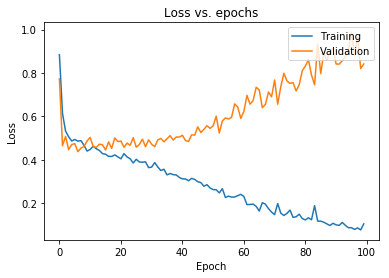

In [22]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [28]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback
class myCustomTrainingCallBack(Callback):
    def on_tran_begin(self,logs=None):
        print(f"Training  Begin!")
    def on_tran_batch_begin(self,batch,logs=None):
        print(f"Training Batch {batch} Begin!")
    def on_tran_batch_end(self,batch,logs=None):
        print(f"Training Batch {batch} Ended!")
    def on_epoch_begin(self,epoch,logs=None):
        print(f"Training Epoch {epoch} Begin!")
    def on_epoch_end(self,epoch,logs=None):
        print(f"Training Epoch {epoch} Ended!")
    def on_tran_end(self,logs=None):
        print(f"Training  Ended!")
        
    
class myCustomTestingCallBack(Callback):
    def on_test_begin(self,logs=None):
        print(f"Test  Begin!")
    def on_test_batch_begin(self,batch,logs=None):
        print(f"Testing Batch {batch} Begin!")
    def on_test_batch_end(self,batch,logs=None):
        print(f"Testing Batch {batch} Ended!")
    
    def on_test_end(self,logs=None):
        print(f"Testing  Ended!")  
        
class myCustomPredictionCallBack(Callback):
    def on_predict_begin(self,logs=None):
        print(f"Prediction  Begin!")
    def on_predict_batch_begin(self,batch,logs=None):
        print(f"Predection Batch {batch} Begin!")
    def on_predict_batch_end(self,batch,logs=None):
        print(f"Predection Batch {batch} Ended!")
    
    def on_predict_end(self,logs=None):
        print(f"Predection  Ended!")    



In [29]:
# Re-build the model

model = get_regularised_model(1e-4,0.3)

In [30]:
# Compile the model

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#### Train the model with the callback

In [31]:
# Train the model, with some of the data reserved for validation

history = model.fit(x_train,y_train,validation_split=0.2,epochs=100,callbacks=[myCustomTrainingCallBack()])

Train on 317 samples, validate on 80 samples
Training Epoch 0 Begin!
Epoch 1/100
317/317 [==============================] - 1s 5ms/sample - loss: 1.0264 - mae: 0.8573 - val_loss: 0.9816 - val_mae: 0.8000
Training Epoch 1 Begin!
Epoch 2/100
317/317 [==============================] - 0s 653us/sample - loss: 0.8140 - mae: 0.7592 - val_loss: 0.6327 - val_mae: 0.6364
Training Epoch 2 Begin!
Epoch 3/100
317/317 [==============================] - 0s 926us/sample - loss: 0.6152 - mae: 0.6066 - val_loss: 0.5552 - val_mae: 0.5775
Training Epoch 3 Begin!
Epoch 4/100
317/317 [==============================] - 0s 647us/sample - loss: 0.5759 - mae: 0.5980 - val_loss: 0.5681 - val_mae: 0.5894
Training Epoch 4 Begin!
Epoch 5/100
317/317 [==============================] - 0s 909us/sample - loss: 0.5293 - mae: 0.5646 - val_loss: 0.5457 - val_mae: 0.5646
Training Epoch 5 Begin!
Epoch 6/100
317/317 [==============================] - 0s 666us/sample - loss: 0.5366 - mae: 0.5661 - val_loss: 0.5842 - val_mae

In [34]:
# Evaluate the model

loss,mae = model.evaluate(x_test,y_test,callbacks=[myCustomTestingCallBack()],verbose=0)
print(f"loss:{loss}")
print(f"mae{mae}")

Test  Begin!
Testing Batch 0 Begin!
Testing Batch 0 Ended!
Testing Batch 1 Begin!
Testing Batch 1 Ended!
Testing  Ended!
loss:0.6275096111827426
mae0.5712634921073914


In [35]:
# Make predictions with the model
model.predict(x_test,verbose=False,callbacks=[myCustomPredictionCallBack()])


Prediction  Begin!
Predection Batch 0 Begin!
Predection Batch 0 Ended!
Predection Batch 1 Begin!
Predection Batch 1 Ended!
Predection  Ended!


array([[-0.903765  ],
       [-0.8553952 ],
       [-0.79856104],
       [ 0.73750955],
       [-0.85784024],
       [-0.841197  ],
       [-0.28858817],
       [-0.88570607],
       [-0.13508058],
       [-1.2089466 ],
       [ 1.196693  ],
       [-0.23789226],
       [ 1.031256  ],
       [-0.40634558],
       [ 1.5759509 ],
       [ 0.7495084 ],
       [ 0.09856676],
       [ 0.12383475],
       [-0.925305  ],
       [ 1.7366914 ],
       [ 1.4768171 ],
       [ 1.026974  ],
       [-0.8862139 ],
       [ 1.4168937 ],
       [-0.08414901],
       [ 1.9997184 ],
       [-0.7503598 ],
       [-0.8683016 ],
       [ 0.62658113],
       [-0.73291755],
       [ 0.12966815],
       [ 1.0066056 ],
       [-0.03088603],
       [ 0.3136696 ],
       [ 1.2327237 ],
       [-0.74952096],
       [-0.35996822],
       [-0.19007976],
       [ 1.6147248 ],
       [-0.07893458],
       [ 0.38204405],
       [-1.1295042 ],
       [-1.0736626 ],
       [-0.8303794 ],
       [ 0.28809083]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [38]:
# Re-train the unregularised model

unreg_model = get_model()
unreg_model.compile(optimizer='adam',loss='mse',metrics=['mae'])
unreg_history = unreg_model.fit(x_train,y_train,validation_split=0.1,verbose=1,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Train on 357 samples, validate on 40 samples
Epoch 1/100
357/357 [==============================] - 1s 4ms/sample - loss: 0.9806 - mae: 0.8544 - val_loss: 0.9678 - val_mae: 0.7932
Epoch 2/100
357/357 [==============================] - 0s 500us/sample - loss: 0.8723 - mae: 0.8029 - val_loss: 0.7608 - val_mae: 0.7075
Epoch 3/100
357/357 [==============================] - 0s 525us/sample - loss: 0.7158 - mae: 0.7190 - val_loss: 0.5802 - val_mae: 0.6036
Epoch 4/100
357/357 [==============================] - 0s 319us/sample - loss: 0.6061 - mae: 0.6424 - val_loss: 0.5030 - val_mae: 0.5749
Epoch 5/100
357/357 [==============================] - 0s 548us/sample - loss: 0.5481 - mae: 0.6007 - val_loss: 0.4602 - val_mae: 0.5460
Epoch 6/100
357/357 [==============================] - 0s 296us/sample - loss: 0.5530 - mae: 0.6109 - val_loss: 0.4794 - val_mae: 0.5495
Epoch 7/100
357/357 [==============================] - 0s 318us/sample - loss: 0.5078 - mae: 0.5748 - val_loss: 0.4625 - val_mae: 0.540

In [39]:
# Evaluate the model on the test set

unreg_model.evaluate(x_test,y_test)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.450732864273919, 0.5640684]

In [40]:
# Re-train the regularised model

reg_model = get_regularised_model(0.0001,0.3)
reg_model.compile(optimizer='adam',loss='mse',metrics=['mae'])
reg_history = reg_model.fit(x_train,y_train,validation_split=0.1,verbose=1,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Train on 357 samples, validate on 40 samples
Epoch 1/100
357/357 [==============================] - 2s 5ms/sample - loss: 1.0246 - mae: 0.8510 - val_loss: 0.9599 - val_mae: 0.7736
Epoch 2/100
357/357 [==============================] - 0s 854us/sample - loss: 0.7603 - mae: 0.7192 - val_loss: 0.5263 - val_mae: 0.5516
Epoch 3/100
357/357 [==============================] - 0s 817us/sample - loss: 0.6052 - mae: 0.5894 - val_loss: 0.5248 - val_mae: 0.5650
Epoch 4/100
357/357 [==============================] - 0s 596us/sample - loss: 0.5807 - mae: 0.6041 - val_loss: 0.5385 - val_mae: 0.5557
Epoch 5/100
357/357 [==============================] - 0s 835us/sample - loss: 0.5730 - mae: 0.5851 - val_loss: 0.5335 - val_mae: 0.5470
Epoch 6/100
357/357 [==============================] - 0s 828us/sample - loss: 0.5186 - mae: 0.5547 - val_loss: 0.5011 - val_mae: 0.5360
Epoch 7/100
357/357 [==============================] - 0s 836us/sample - loss: 0.5135 - mae: 0.5547 - val_loss: 0.5012 - val_mae: 0.532

In [41]:
# Evaluate the model on the test set

reg_model.evaluate(x_test,y_test)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.49559623930189345, 0.5668663]

#### Plot the learning curves

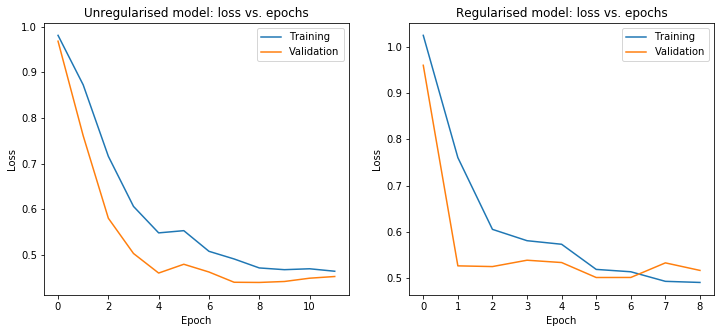

In [42]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()